In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/AF/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [109]:
def plot_sys(v,t):
        plot(t,v(t))
        xlabel('Quantity of water consumed')
        ylabel('Average rate of flow')

In [110]:
k_0 = 350#Carrying capacity 
x_0 =300
def logistic(q, k=k_0,r= 0.01):
    return k_0/(1+ exp(-r*(q-x_0)))

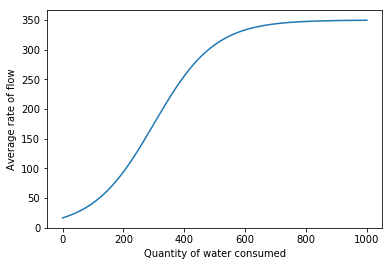

In [111]:
x = linspace(1,6, 10)
q= linspace(0,1000,10000)
plot_sys(logistic,q)



In [504]:
s_0 = 1000
# Requires: v0: initial volume
#           T:  timesteps
#           T_drink: times of drinking
#           Q: The corresponding amount drunk
#           s0: the constant of threshold for firing
#           k, r: the parameters of logistic
#           PROP: proportion of the water drunk that reaches bladder (const. set to 0.68)
# Modifies: nothing
# Returns: V, the volume of liquid in bladder
#          R, the rates
def integ_fire(T, T_drink, Q, 
               v0=0, s0=s_0, k=k_0, r=0.01, PROP=0.68):
    
        q=linspace(0,1000,10000)
        MINr = min(logistic(q)) 
        epsilon_r = 0
        thresh = s0 # modify if needed
        V = np.zeros(len(T)) # volume of bladder
        R = np.zeros(len(T)) # keeping R
        
        rbar = float(logistic(np.mean(q), k, r)) /60 # a default value
        t_total = PROP*np.mean(q)/rbar # a default value 
        q = 0
        
        i_drink = 0
        t_prevDrink = 0
        
        for i, t in enumerate(T[:-1]):
            
            if (V[i] > thresh):
                print('Fire')
                V[i+1] = 0
                continue
                
            if (t in T_drink):
                T_drink.remove(t)
                if (t-t_prevDrink > t_total):
                    q = Q[i_drink]
                else:
                    print('early drink')
                    q = (float(1)/PROP)*rbar*(t_total - (t - t_prevDrink)) + float(Q[i_drink])
                
                rbar = float(logistic(q, k, r)) / 60 # per minute we want
                t_total = PROP*float(q)/rbar
                i_drink += 1
                t_prevDrink = t
                
            #rate = max(2*rbar*(1 - float((t-t_prevDrink))/t_total), 0) # this is dV/dt # this is for variable r
            rate = rbar # this is for const rate
            V[i+1] = V[i] + rate
            R[i] = rate

            
        return V, R
                    

In [505]:
# test
import random
import numpy as np

T = [x for x in range(24*60)] # over a day

T_drink = set()
Q = []
for i in range(20):
    T_drink.add(random.choice(T))
    Q = Q + [random.randint(0, 700)]
    

In [506]:
intfi = integ_fire(T=T, T_drink=T_drink, Q=Q)

early drink
early drink
early drink
Fire
early drink
early drink
early drink
early drink
Fire
early drink
Fire
early drink
Fire
early drink
early drink
early drink
Fire
early drink
Fire
early drink


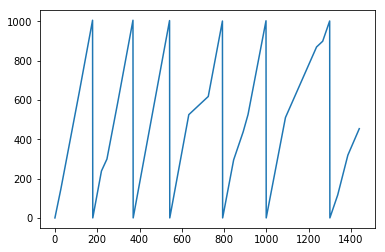

In [507]:
plot(T, intfi[0])